#**Model building** 

In [13]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


In [14]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [15]:
# resize data for the model
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [16]:
#CNN model with 1 CONV layers in Kears
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#The first CNN layer followed by Relu and MaxPooling layers


model.add(Flatten())
#Flatten layer to stack the output convolutions from first convolution layer

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.25))
#Dense layer of  neurons

model.add(Dense(units = 1 , activation = 'sigmoid'))
#The Final layer with two outputs for two categories

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23040128  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [18]:
#fit the model
history = model.fit(x_train, y_train ,epochs = 12 , validation_data = (x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
8/8 [==============================] - 6s 711ms/step - loss: 22.8159 - accuracy: 0.7951 - val_loss: 0.2332 - val_accuracy: 0.9500
Epoch 2/12
8/8 [==============================] - 5s 659ms/step - loss: 1.3087 - accuracy: 0.9713 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/12
8/8 [==============================] - 5s 670ms/step - loss: 0.4465 - accuracy: 0.9795 - val_loss: 0.2927 - val_accuracy: 0.9500
Epoch 4/12
8/8 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9877
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
8/8 [==============================] - 5s 665ms/step - loss: 0.2573 - accuracy: 0.9877 - val_loss: 0.1533 - val_accuracy: 0.9500
Epoch 5/12
8/8 [==============================] - 5s 673ms/step - loss: 0.0080 - accuracy: 0.9959 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 6/12
8/8 [==============================] - ETA: 0s - loss: 9.3453e-06 - accuracy: 1.0000
Epoch 00006: ReduceLROnPlateau reducing le

In [19]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 2ms/step - loss: 8.0512e-04 - accuracy: 1.0000
Loss of the model is -  0.0008051227778196335
1/1 [==============================] - 0s 1ms/step - loss: 8.0512e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


#**Analysis after Model Training**



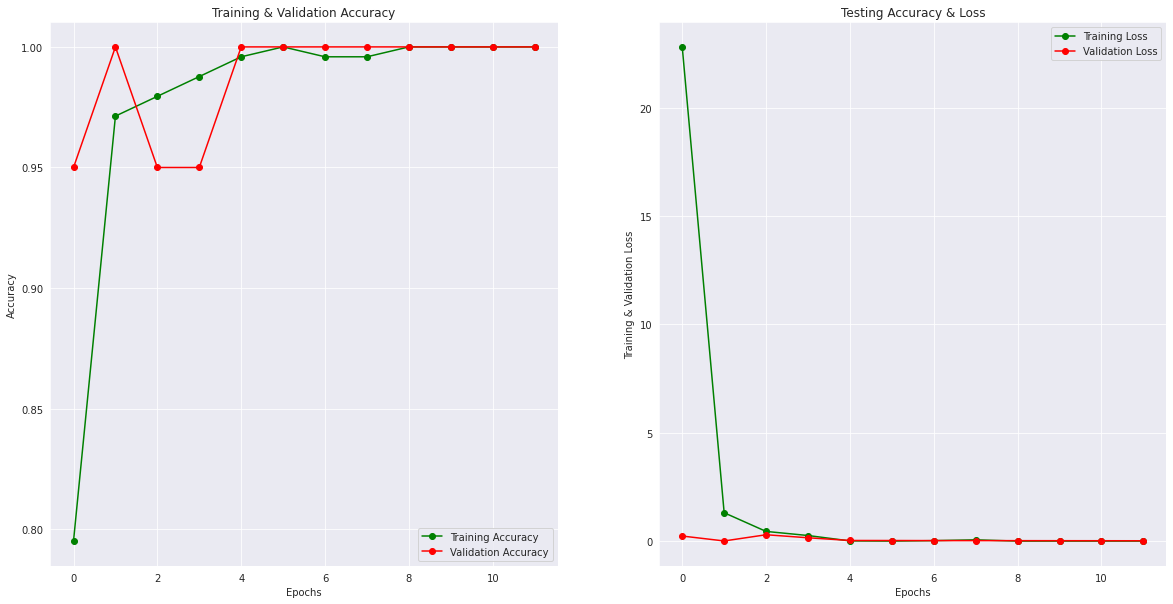

In [20]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


In [21]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
print(classification_report(y_test, predictions, target_names = ['corona (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

corona (Class 0)       1.00      1.00      1.00        10
Normal (Class 1)       1.00      1.00      1.00        10

        accuracy                           1.00        20
       macro avg       1.00      1.00      1.00        20
    weighted avg       1.00      1.00      1.00        20



In [23]:
#confusion matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[10,  0],
       [ 0, 10]])

In [24]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

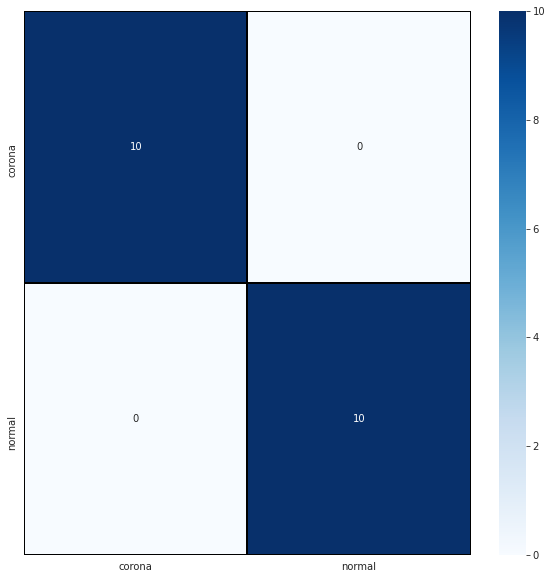

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

#**check prediction**

In [26]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

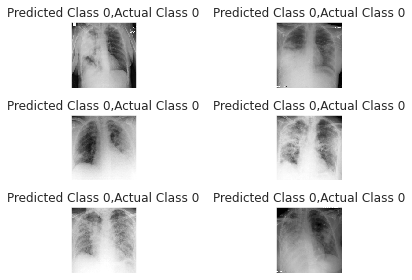

In [27]:
#view correct predictions
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [28]:
#view incorrect predictions
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

# **Make a prediction for a new image**

In [29]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
	# just change the path of the image from your drive
img = load_image("/content/drive/My Drive/Colab Notebooks/corona/p.jpg")
img = img.reshape(-1,150,150, 1)
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("NORMAL")
else:
  print(" corona")

 corona
